In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from scipy.stats import norm

In [2]:
df=pd.read_csv("C:/Users/2261092/Downloads/Market+Risk+Dataset.csv")

In [3]:
df.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [4]:
df.columns=df.columns.str.replace(" ","-")

In [5]:
df.head()

,Date,Infosys,Indian-Hotel,Mahindra-&-Mahindra,Axis-Bank,SAIL,Shree-Cement,Sun-Pharma,Jindal-Steel,Idea-Vodafone,Jet-Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [6]:
print("The number of rows are {} and number of columns are {}".format(df.shape[0],df.shape[1]))

The number of rows are 314 and number of columns are 11


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian-Hotel         314 non-null    int64 
 3   Mahindra-&-Mahindra  314 non-null    int64 
 4   Axis-Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree-Cement         314 non-null    int64 
 7   Sun-Pharma           314 non-null    int64 
 8   Jindal-Steel         314 non-null    int64 
 9   Idea-Vodafone        314 non-null    int64 
 10  Jet-Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [8]:
df["Date"]=[pd.to_datetime(d) for d in df["Date"]]

C:\Users\2261092\AppData\Local\Temp\ipykernel_21016\2085257112.py:1: UserWarning: Parsing '31-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Date"]=[pd.to_datetime(d) for d in df["Date"]]
C:\Users\2261092\AppData\Local\Temp\ipykernel_21016\2085257112.py:1: UserWarning: Parsing '14-04-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Date"]=[pd.to_datetime(d) for d in df["Date"]]
C:\Users\2261092\AppData\Local\Temp\ipykernel_21016\2085257112.py:1: UserWarning: Parsing '21-04-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Date"]=[pd.to_datetime(d) for d in df["Date"]]
C:\Users\2261092\AppData\Local\Temp\ipykernel_21016\2085257112.py:1: UserWarning: Parsing '28-04-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Date"]=[pd.to_datetime(d) f

In [9]:
df.dtypes.value_counts()

int64             10
datetime64[ns]     1
dtype: int64

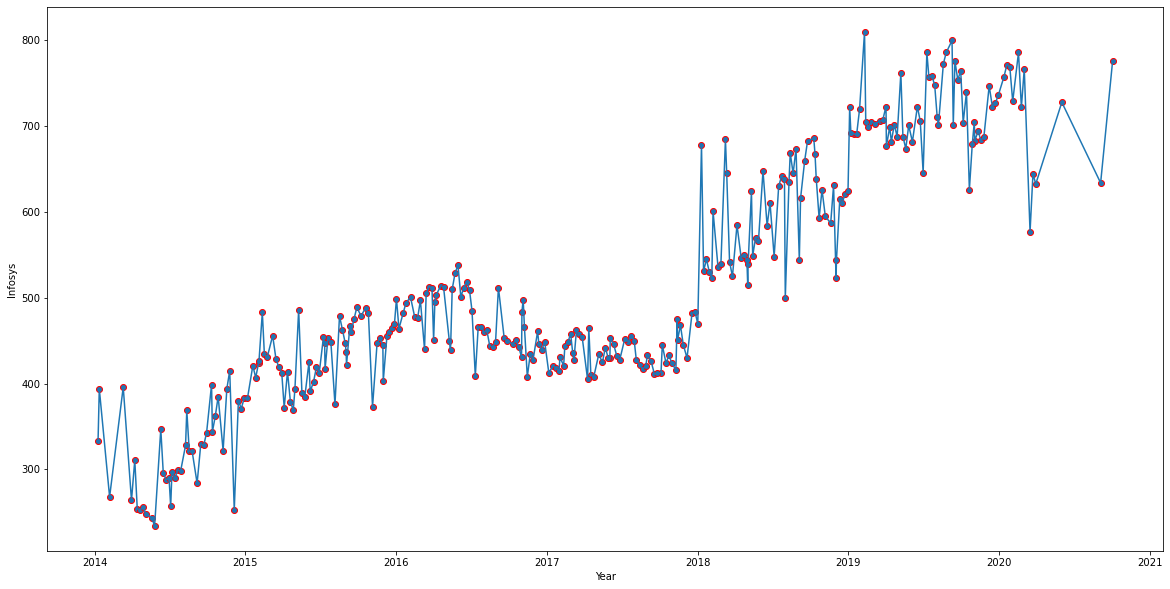

In [10]:
plt.figure(figsize=(20,10))
plt.scatter(df["Date"],df["Infosys"],edgecolors="r")
sns.lineplot(data=df, x="Date", y="Infosys")
plt.xlabel("Year")
plt.ylabel("Infosys")
plt.show()

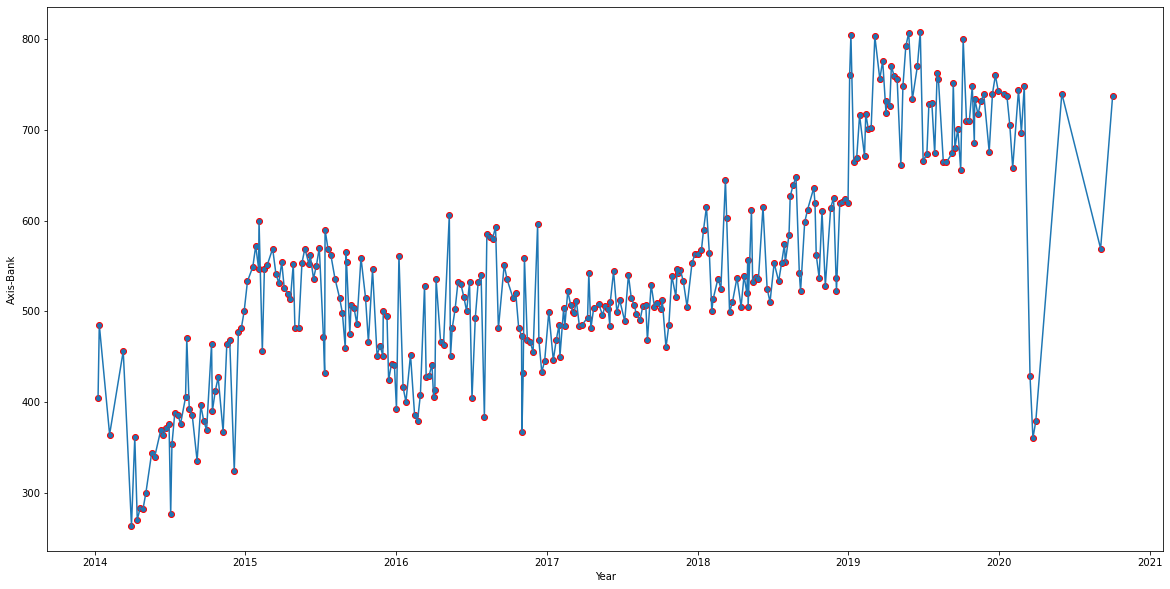

In [11]:
plt.figure(figsize=(20,10))
plt.scatter(df["Date"],df["Axis-Bank"],edgecolors="r")
sns.lineplot(data=df, x="Date", y="Axis-Bank")
plt.xlabel("Year")
plt.ylabel("Axis-Bank")
plt.show()

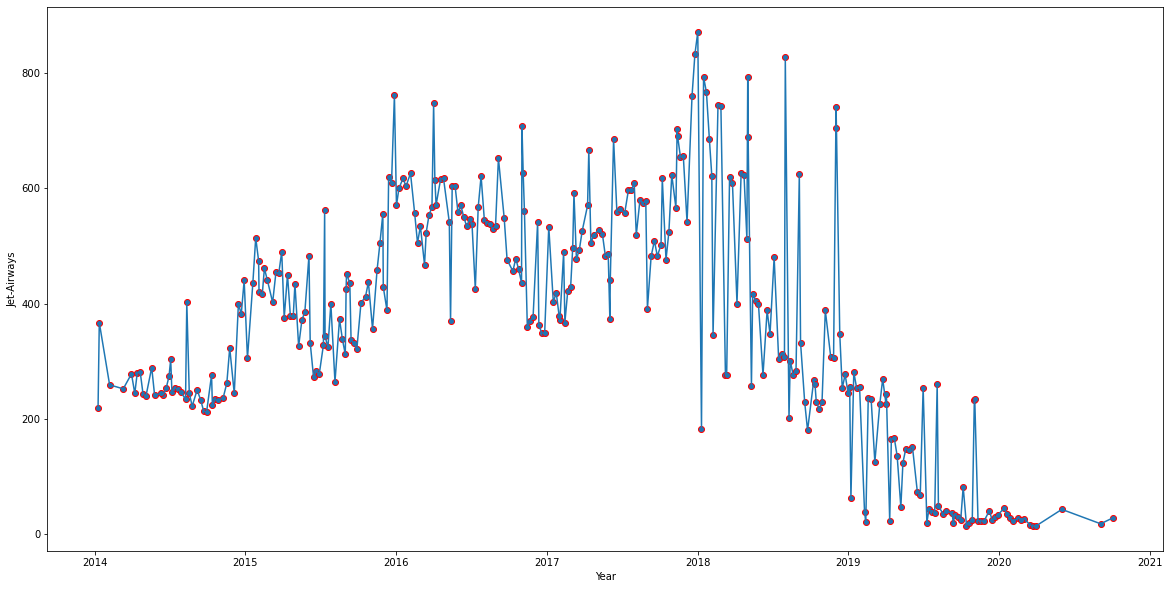

In [12]:
plt.figure(figsize=(20,10))
plt.scatter(df["Date"],df["Jet-Airways"],edgecolors="r")
sns.lineplot(data=df, x="Date", y="Jet-Airways")
plt.xlabel("Year")
plt.ylabel("Jet-Airways")
plt.show()

In [13]:
stock_returns=np.log(df.drop("Date", axis=1)).diff(axis=0, periods=1)

In [14]:
stock_returns.shape

(314, 10)

In [15]:
stock_returns

,Infosys,Indian-Hotel,Mahindra-&-Mahindra,Axis-Bank,SAIL,Shree-Cement,Sun-Pharma,Jindal-Steel,Idea-Vodafone,Jet-Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846
...,...,...,...,...,...,...,...,...,...,...
309,0.009649,-0.110348,0.030305,-0.057580,-0.087011,0.023688,0.072383,-0.053346,-0.287682,-0.127833
310,-0.139625,-0.051293,-0.093819,-0.145324,-0.095310,-0.081183,-0.043319,-0.187816,0.693147,-0.200671
311,-0.094207,-0.236389,-0.285343,-0.284757,-0.105361,-0.119709,-0.050745,-0.141830,-0.693147,-0.117783
312,0.109856,-0.182322,-0.091269,-0.173019,-0.251314,-0.067732,-0.076851,-0.165324,0.000000,-0.133531


In [16]:
stock_means=stock_returns.mean(axis=0)
stock_means.sort_values(ascending=False)

Shree-Cement           0.003681
Infosys                0.002794
Axis-Bank              0.001167
Indian-Hotel           0.000266
Sun-Pharma            -0.001455
Mahindra-&-Mahindra   -0.001506
SAIL                  -0.003463
Jindal-Steel          -0.004123
Jet-Airways           -0.009548
Idea-Vodafone         -0.010608
dtype: float64

In [17]:
stock_sd=stock_returns.std(axis=0)
stock_sd.sort_values(ascending=False)

Idea-Vodafone          0.104315
Jet-Airways            0.097972
Jindal-Steel           0.075108
SAIL                   0.062188
Indian-Hotel           0.047131
Axis-Bank              0.045828
Sun-Pharma             0.045033
Mahindra-&-Mahindra    0.040169
Shree-Cement           0.039917
Infosys                0.035070
dtype: float64

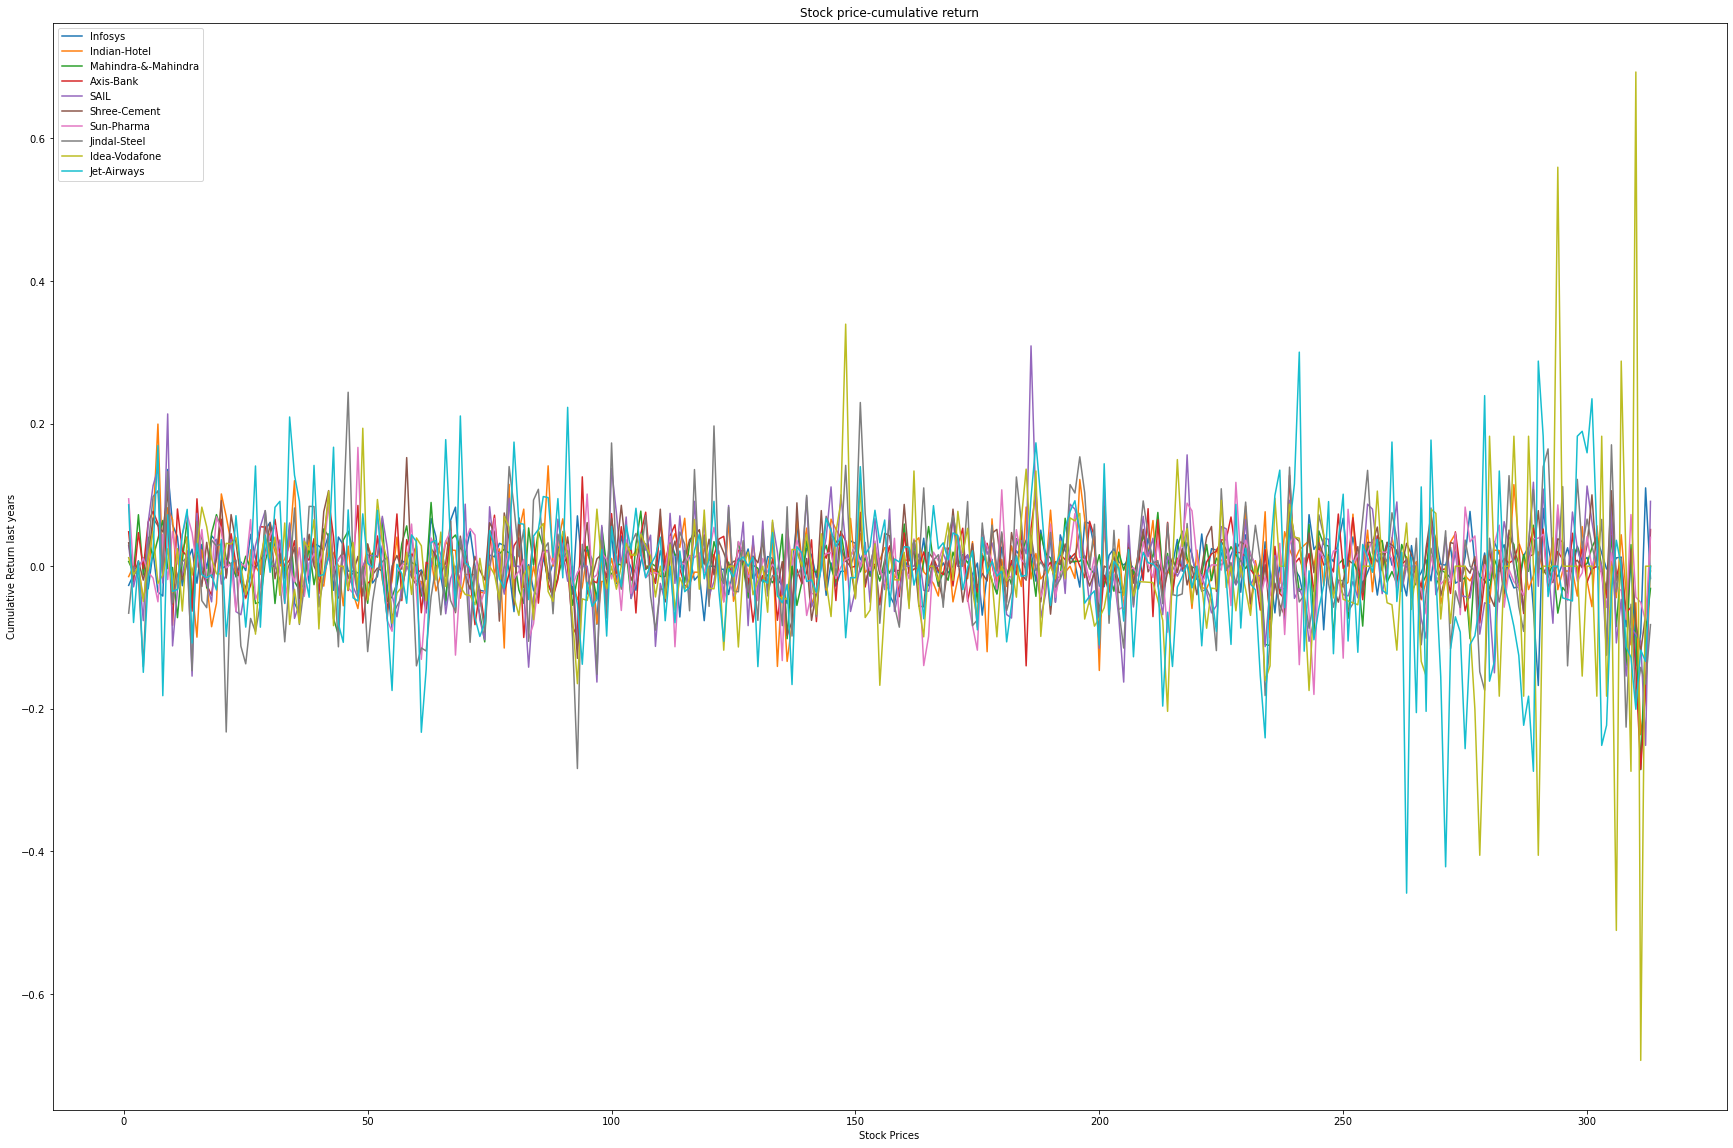

In [18]:
stock_returns.plot(figsize=(30,20))
plt.xlabel("Stock Prices")
plt.ylabel("Cumulative Return last years")
plt.title("Stock price-cumulative return")
plt.show()

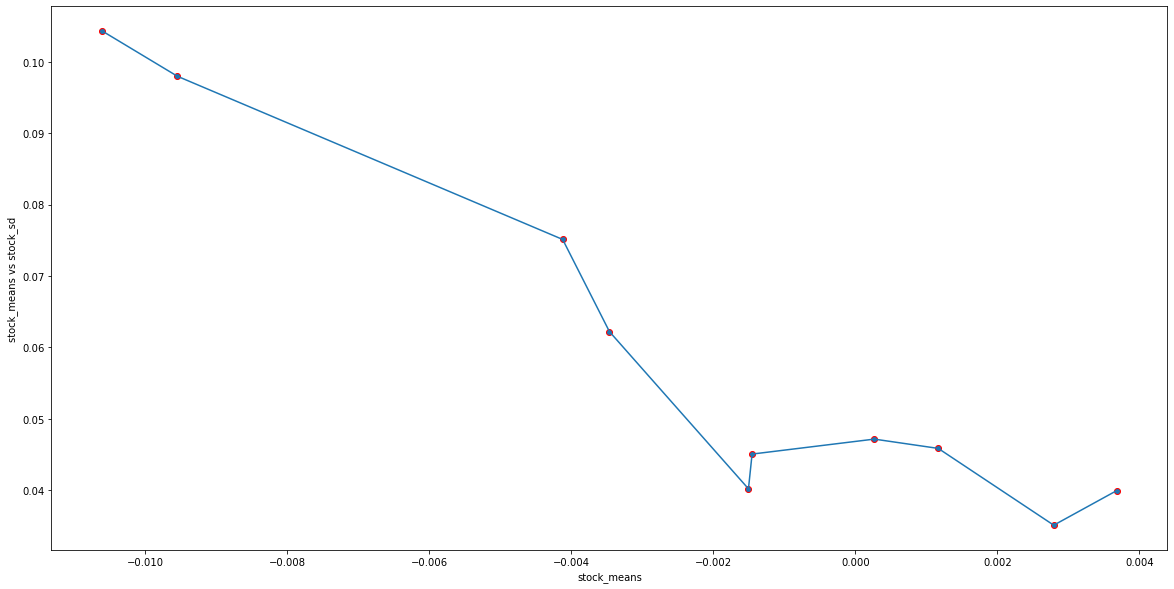

In [19]:
plt.figure(figsize=(20,10))
plt.scatter(stock_means, stock_sd, edgecolors="r")
sns.lineplot(data=df, x=stock_means, y=stock_sd)
plt.xlabel("stock_means")
plt.ylabel("stock_means vs stock_sd")
plt.show()

In [20]:
df=pd.DataFrame({"Average":stock_means, "volatility":stock_sd})
df.sort_values(by=["Average"], ascending=False)

,Average,volatility
Shree-Cement,0.003681,0.039917
Infosys,0.002794,0.035070
Axis-Bank,0.001167,0.045828
Indian-Hotel,0.000266,0.047131
Sun-Pharma,-0.001455,0.045033
Mahindra-&-Mahindra,-0.001506,0.040169
SAIL,-0.003463,0.062188
Jindal-Steel,-0.004123,0.075108
Jet-Airways,-0.009548,0.097972
Idea-Vodafone,-0.010608,0.104315


In [21]:
df=pd.DataFrame({"Average":stock_means, "volatility":stock_sd})
df.sort_values(by=["volatility"], ascending=False)

,Average,volatility
Idea-Vodafone,-0.010608,0.104315
Jet-Airways,-0.009548,0.097972
Jindal-Steel,-0.004123,0.075108
SAIL,-0.003463,0.062188
Indian-Hotel,0.000266,0.047131
Axis-Bank,0.001167,0.045828
Sun-Pharma,-0.001455,0.045033
Mahindra-&-Mahindra,-0.001506,0.040169
Shree-Cement,0.003681,0.039917
Infosys,0.002794,0.035070
